## Logistic Regression Exercise

In [58]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

**Part 1: Load and explore**

1. Load the dataset and display the first few rows.  

In [2]:
#Read the movies csv file into dataframe
movies = pd.read_csv('../data/movies.csv')
movies.head()

,Title,Year,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID,Nominee,Winner,Genre_Action,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_TV Movie,Genre_Thriller,Genre_War,Genre_Western
0,#Alive,2020,7.228,1956,6300000,13416285,614696,0,0,True,...,False,True,False,False,False,True,False,False,False,False
1,10 Cloverfield Lane,2016,6.994,8359,15000000,110216998,333371,0,0,False,...,False,True,False,False,False,True,False,True,False,False
2,12 Strong,2018,6.346,3097,35000000,67450815,429351,0,0,True,...,True,False,False,False,False,False,False,False,True,False
3,13 Hours: The Secret Soldiers of Benghazi,2016,7.269,3789,50000000,69411370,300671,0,0,True,...,True,False,False,False,False,False,False,True,True,False
4,1917,2019,8.000,13092,100000000,446064352,530915,1,0,True,...,True,False,False,False,False,False,False,False,True,False


2. How many movies in the dataset were nominated for Best Picture?  

In [3]:
# Check the how movie were nominated for best picture
movies.groupby('Nominee').size()[1]

np.int64(91)

In [4]:
movies['Nominee'].value_counts()[1]

np.int64(91)

3. What percentage of movies were nominated?  

In [5]:
percent_nominated = movies['Nominee'].value_counts(normalize=True)[1]
print(f'percentage of nominated movies {percent_nominated * 100}')

percentage of nominated movies 9.054726368159203


In [6]:
# Sum of nominated pictures
nominated_movies = movies['Nominee'].sum()
print(f'total number of nominated pictures {nominated_movies}')

# Count of total number of movies
Total_movies = movies['Nominee'].count()
print(f'total number of movies {Total_movies}')

#Percentage of nominated movies
percent_nominated = (nominated_movies/Total_movies) * 100
print(f'percentage of nominated movies {percent_nominated}')

total number of nominated pictures 91
total number of movies 1005
percentage of nominated movies 9.054726368159203


4. Compute the average revenue for:  
    * nominated movies  
    * non-nominated movies  
Does revenue look associated with nominations?

In [7]:
# Avg revenue of nominated and non nominated movies

avg_revenue = movies.groupby('Nominee')['Revenue'].mean()
print(f'Average Revenue for Nominated Movies is {avg_revenue[1]}')
print(f'Average Revenue for non-nominated Movies is {avg_revenue[0]}')

Average Revenue for Nominated Movies is 232573777.25274727
Average Revenue for non-nominated Movies is 189624332.38402626


**Part 2: Logistic Regression: Revenue Only**

5. Fit a logistic regression model for whether a movie was nominated based on its revenue.  

In [8]:
#Fit a logical regression model nominated movies based on revenue
movies_Rev_logreg = smf.logit("Nominee ~ Revenue",
                          data = movies).fit()

Optimization terminated successfully.
         Current function value: 0.303106
         Iterations 6


In [9]:
movies_Rev_logreg.params

Intercept   -2.385659e+00
Revenue      3.752031e-10
dtype: float64

6. Interpret the sign of the coefficient for Revenue.  

Revenue      3.752031e-10
The sign of the coefficient for Revenue is positive. 
It means that the Revenue increases the probability of movie nomination also increases.

7. Use the model to estimate the probability of nomination for a movie with $10M revenue, $100M revenue, and $500M revenue.  

In [10]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

In [11]:
Dollars = 10000000

logit_p = movies_Rev_logreg.params['Intercept'] + movies_Rev_logreg.params['Revenue'] * Dollars

print(f'Estimated Probability of nomination for a movie with 10M revenue: {logistic(logit_p)}')

Estimated Probability of nomination for a movie with 10M revenue: 0.08456283924639596


In [12]:
Dollars = 100000000

logit_p = movies_Rev_logreg.params['Intercept'] + movies_Rev_logreg.params['Revenue'] * Dollars

print(f'Estimated Probability of nomination for a movie with 100M revenue: {logistic(logit_p)}')

Estimated Probability of nomination for a movie with 100M revenue: 0.08721384640957922


In [13]:
Dollars = 500000000

logit_p = movies_Rev_logreg.params['Intercept'] + movies_Rev_logreg.params['Revenue'] * Dollars

print(f'Estimated Probability of nomination for a movie with 500M revenue: {logistic(logit_p)}')

Estimated Probability of nomination for a movie with 500M revenue: 0.09992508312035361


8. Make a plot of predicted probability vs. revenue.

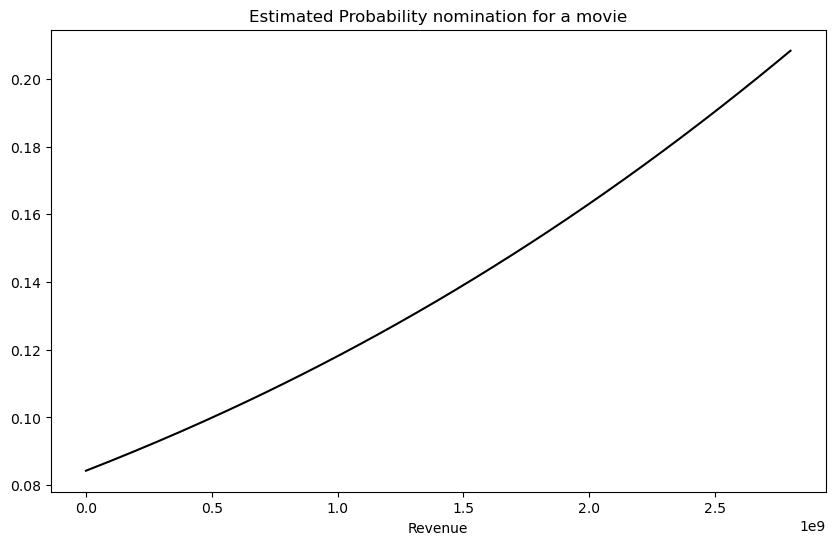

In [14]:
fit_df = pd.DataFrame({
    'Revenue': np.linspace(start = movies['Revenue'].min(),
                            stop = movies['Revenue'].max(),
                            num = 150)
})

fit_df['fit'] = movies_Rev_logreg.predict(fit_df)

fit_df.plot(x = 'Revenue',
             y = 'fit',
             legend = False,
             figsize = (10,6),
             color = 'black',
            title = 'Estimated Probability nomination for a movie');

**Part 3: Add Genre**

9. Fit a model for whether a movie was nominated based on its revenue and whether or not it is a drama.  

In [37]:
#Fit a logical regression model nominated movies based on revenue and drama
movies['Genre_Drama'] = movies['Genre_Drama'].astype(int)
movies_Rev_drama_logreg = smf.logit("Nominee ~ Revenue + Genre_Drama",
                          data = movies).fit()

Optimization terminated successfully.
         Current function value: 0.234564
         Iterations 8


10. Interpret the coefficient for Genre_Drama. 

In [38]:
movies_Rev_drama_logreg.params

Intercept     -4.783568e+00
Revenue        1.727152e-09
Genre_Drama    3.340881e+00
dtype: float64

In [40]:
print(f'coefficient for Genre_Drama {movies_Rev_drama_logreg.params['Genre_Drama']}')

coefficient for Genre_Drama 3.3408809968431914


11. Using your final model, compute the predicted probabilities of nominations for:  
    * $20M non-drama
    * $20M drama
    * $300M non-drama
    * $300M drama  

In [42]:
Dollars = 20000000
logit_p = movies_Rev_drama_logreg.params['Intercept'] + movies_Rev_drama_logreg.params['Revenue'] * Dollars +movies_Rev_drama_logreg.params['Genre_Drama'] * 0
print(f'Estimated Probability of nomination for a movie with 20M revenue and non drama: {logistic(logit_p)}')
logit_p = movies_Rev_drama_logreg.params['Intercept'] + movies_Rev_drama_logreg.params['Revenue'] * Dollars +movies_Rev_drama_logreg.params['Genre_Drama'] * 1
print(f'Estimated Probability of nomination for a movie with 20M revenue and drama: {logistic(logit_p)}')

Estimated Probability of nomination for a movie with 20M revenue and non drama: 0.008585781585731629
Estimated Probability of nomination for a movie with 20M revenue and drama: 0.1965269772367626


In [44]:
Dollars = 300000000
logit_p = movies_Rev_drama_logreg.params['Intercept'] + movies_Rev_drama_logreg.params['Revenue'] * Dollars +movies_Rev_drama_logreg.params['Genre_Drama'] * 0
print(f'Estimated Probability of nomination for a movie with 300M revenue and non drama: {logistic(logit_p)}')
logit_p = movies_Rev_drama_logreg.params['Intercept'] + movies_Rev_drama_logreg.params['Revenue'] * Dollars +movies_Rev_drama_logreg.params['Genre_Drama'] * 1
print(f'Estimated Probability of nomination for a movie with 300M revenue and drama: {logistic(logit_p)}')

Estimated Probability of nomination for a movie with 300M revenue and non drama: 0.013851378343699112
Estimated Probability of nomination for a movie with 300M revenue and drama: 0.2840334711198761


12. Which variable has the larger effect: being a drama or revenue?

In [45]:
0.1965269772367625-0.008585781585731622

0.18794119565103087

In [46]:
0.2840334711198759-0.0138513783436991

0.27018209277617683

Based on the prediction probabilities nominations based on revenue and drama, looks like drama has the larger effect compared to revenue

**Part 4: Stretch Questions**  

13. How do the empirical and estimated probabilities look for the revenue-only model? What about the model that uses both revenue and the drama genre?    

In [47]:
#calculate empirical(actual) probability(eprob) for the revenue-only model
movies_summary = (
    movies
    .assign(group = pd.qcut(movies['Revenue'], 
                            q = 10, 
                            duplicates = 'drop'))
    .groupby('group', observed = False)
    [['Revenue', 'Nominee']]
    .mean()
    .reset_index()
    .rename(columns = {'Nominee': 'eprob'})
)
movies_summary

,group,Revenue,eprob
0,"(-0.001, 1444389.0]",8.789764e+04,0.049751
1,"(1444389.0, 21107167.4]",1.076188e+07,0.089109
2,"(21107167.4, 42412175.6]",3.167992e+07,0.120000
3,"(42412175.6, 73900000.0]",5.607996e+07,0.118812
4,"(73900000.0, 119688968.6]",9.390313e+07,0.110000
5,"(119688968.6, 180593261.2]",1.489283e+08,0.100000
6,"(180593261.2, 297930179.2]",2.301296e+08,0.079208
7,"(297930179.2, 525616873.2]",3.964409e+08,0.070000
8,"(525616873.2, 2799439100.0]",9.640975e+08,0.118812


In [48]:
#Calculate Predicted nomination probability(fit_prob) for the revenue-only model
movies_summary['fit_prob'] = movies_Rev_logreg.predict(movies_summary[['Revenue']])
movies_summary

,group,Revenue,eprob,fit_prob
0,"(-0.001, 1444389.0]",8.789764e+04,0.049751,0.084275
1,"(1444389.0, 21107167.4]",1.076188e+07,0.089109,0.084585
2,"(21107167.4, 42412175.6]",3.167992e+07,0.120000,0.085195
3,"(42412175.6, 73900000.0]",5.607996e+07,0.118812,0.085911
4,"(73900000.0, 119688968.6]",9.390313e+07,0.110000,0.087032
5,"(119688968.6, 180593261.2]",1.489283e+08,0.100000,0.088686
6,"(180593261.2, 297930179.2]",2.301296e+08,0.079208,0.091180
7,"(297930179.2, 525616873.2]",3.964409e+08,0.070000,0.096484
8,"(525616873.2, 2799439100.0]",9.640975e+08,0.118812,0.116714


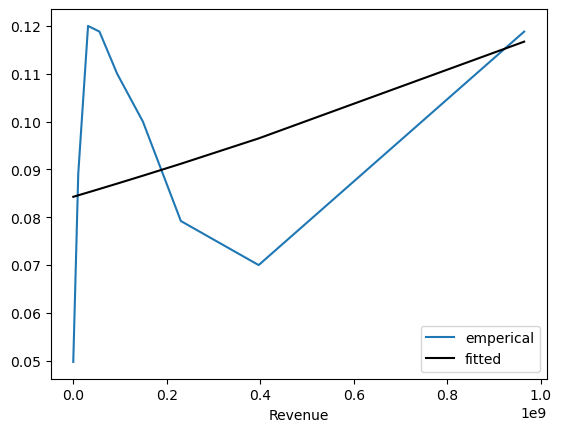

In [64]:
ax = movies_summary.plot(x = 'Revenue', y = 'eprob', label ='emperical')
movies_summary.plot(x = 'Revenue', y = 'fit_prob', label ='fitted',
                color = 'black',
                ax = ax);

In [50]:
movies_summary['elogit'] = np.log(movies_summary['eprob'] / (1 - movies_summary['eprob']))
movies_summary['fit_logit'] = np.log(movies_summary['fit_prob'] / (1 - movies_summary['fit_prob']))
movies_summary

,group,Revenue,eprob,fit_prob,elogit,fit_logit
0,"(-0.001, 1444389.0]",8.789764e+04,0.049751,0.084275,-2.949688,-2.385626
1,"(1444389.0, 21107167.4]",1.076188e+07,0.089109,0.084585,-2.324564,-2.381621
2,"(21107167.4, 42412175.6]",3.167992e+07,0.120000,0.085195,-1.992430,-2.373772
3,"(42412175.6, 73900000.0]",5.607996e+07,0.118812,0.085911,-2.003730,-2.364617
4,"(73900000.0, 119688968.6]",9.390313e+07,0.110000,0.087032,-2.090741,-2.350426
5,"(119688968.6, 180593261.2]",1.489283e+08,0.100000,0.088686,-2.197225,-2.329780
6,"(180593261.2, 297930179.2]",2.301296e+08,0.079208,0.091180,-2.453158,-2.299313
7,"(297930179.2, 525616873.2]",3.964409e+08,0.070000,0.096484,-2.586689,-2.236913
8,"(525616873.2, 2799439100.0]",9.640975e+08,0.118812,0.116714,-2.003730,-2.023926


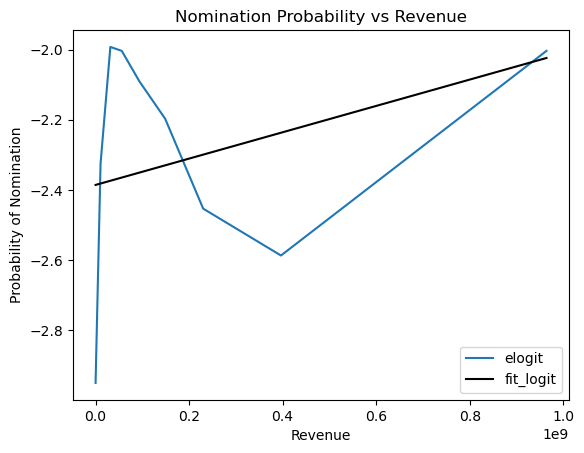

In [60]:
#Plot Probability of Nomination VS Revenue with Drama Effect
ax = movies_summary.plot(x = 'Revenue', y = 'elogit')
movies_summary.plot(x = 'Revenue', y = 'fit_logit',
                color = 'black',
                ax = ax);
plt.xlabel('Revenue')
plt.ylabel('Probability of Nomination')
plt.title('Nomination Probability vs Revenue')
plt.legend()
plt.show()

In [52]:
#calculate empirical(actual) probability(eprob) for the revenue with Drama model
movies_rd_summary = (
    movies
    .assign(group = pd.qcut(movies['Revenue'], 
                            q = 10, 
                            duplicates = 'drop'))
    .groupby('group', observed = False)
     [['Revenue', 'Nominee', 'Genre_Drama']]
    .mean()
    .reset_index()
    .rename(columns = {'Nominee': 'eprob', 'Genre_Drama' : 'avg_drama'})
)
movies_rd_summary

,group,Revenue,eprob,avg_drama
0,"(-0.001, 1444389.0]",8.789764e+04,0.049751,0.383085
1,"(1444389.0, 21107167.4]",1.076188e+07,0.089109,0.564356
2,"(21107167.4, 42412175.6]",3.167992e+07,0.120000,0.560000
3,"(42412175.6, 73900000.0]",5.607996e+07,0.118812,0.455446
4,"(73900000.0, 119688968.6]",9.390313e+07,0.110000,0.350000
5,"(119688968.6, 180593261.2]",1.489283e+08,0.100000,0.300000
6,"(180593261.2, 297930179.2]",2.301296e+08,0.079208,0.227723
7,"(297930179.2, 525616873.2]",3.964409e+08,0.070000,0.200000
8,"(525616873.2, 2799439100.0]",9.640975e+08,0.118812,0.128713


In [53]:
#Calculate Predicted nomination probability(fit_prob) for the revenue and Genre Drama model
movies_rd_summary['fit_prob'] = movies_Rev_drama_logreg.predict(movies_rd_summary[['Revenue', 'avg_drama']].rename(columns={'avg_drama': 'Genre_Drama'}))

movies_rd_summary

,group,Revenue,eprob,avg_drama,fit_prob
0,"(-0.001, 1444389.0]",8.789764e+04,0.049751,0.383085,0.029211
1,"(1444389.0, 21107167.4]",1.076188e+07,0.089109,0.564356,0.053175
2,"(21107167.4, 42412175.6]",3.167992e+07,0.120000,0.560000,0.054271
3,"(42412175.6, 73900000.0]",5.607996e+07,0.118812,0.455446,0.040500
4,"(73900000.0, 119688968.6]",9.390313e+07,0.110000,0.350000,0.030707
5,"(119688968.6, 180593261.2]",1.489283e+08,0.100000,0.300000,0.028635
6,"(180593261.2, 297930179.2]",2.301296e+08,0.079208,0.227723,0.025950
7,"(297930179.2, 525616873.2]",3.964409e+08,0.070000,0.200000,0.031350
8,"(525616873.2, 2799439100.0]",9.640975e+08,0.118812,0.128713,0.063661


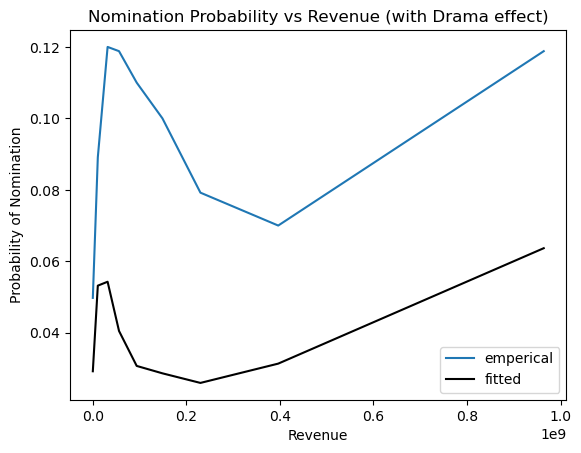

In [62]:
#Plot Probability of Nomination VS Revenue with Drama Effect
ax = movies_rd_summary.plot(x = 'Revenue', y = 'eprob', label ='emperical')
movies_rd_summary.plot(x = 'Revenue', y = 'fit_prob', label ='fitted',
                color = 'black',
                ax = ax);
plt.xlabel('Revenue')
plt.ylabel('Probability of Nomination')
plt.title('Nomination Probability vs Revenue (with Drama effect)')
plt.legend()
plt.show()

14. Revenue is highly skewed, which means that log revenue might make for a better model fit. Try fitting a model using log revenue. Then compare these models. You can look at [Akaike Information Criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion) or the [log-likelihood](https://en.wikipedia.org/wiki/Likelihood_function). You might also look at a [calibration curve](https://encord.com/glossary/calibration-curve/).  

15. Add other genres to your model. Which genres have the largest effect on the estimated probability of being nominated?  

16. Instead of revenue, use profit. How does this change the model?